In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv("../data/economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
# drop unnecessary cols
df_index.drop(['Unnamed: 0' , 'year' , 'month'] , axis= 1 , inplace= True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [10]:
import seaborn as sns

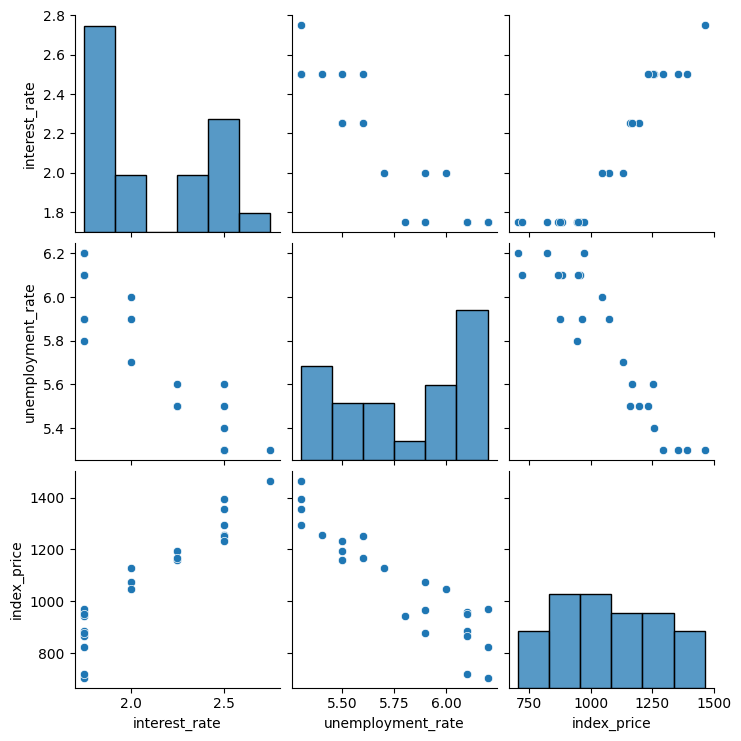

In [11]:
sns.pairplot(df_index)

In [12]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

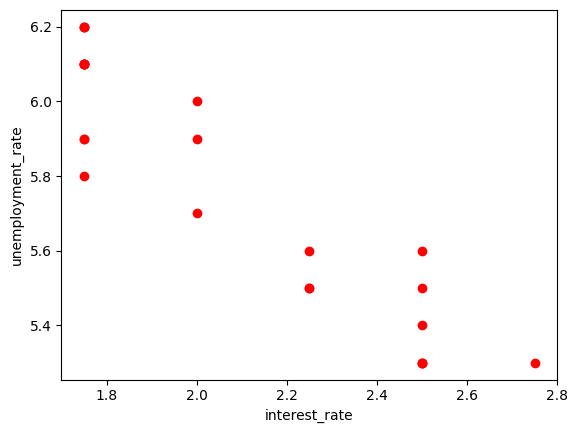

In [15]:
plt.scatter(df_index['interest_rate'] , df_index['unemployment_rate'], color = "r")
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [16]:
## Get independent and dependent features
X = df_index[['interest_rate' , 'unemployment_rate']]
y = df_index['index_price']

In [17]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
# Train test split
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 32)

<Axes: xlabel='interest_rate', ylabel='index_price'>

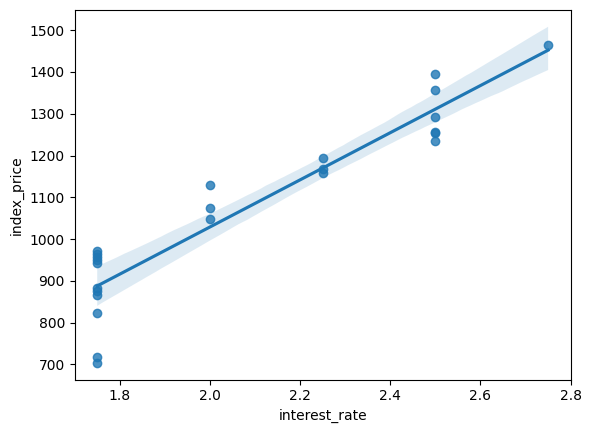

In [22]:
sns.regplot(x=df_index['interest_rate'] , y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

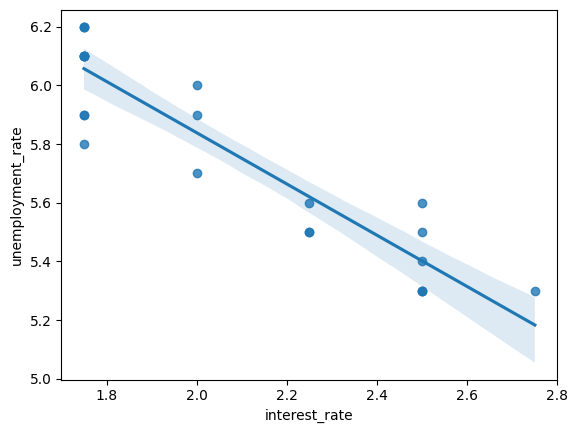

In [23]:
sns.regplot(x=df_index['interest_rate'] , y=df_index['unemployment_rate'])

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression

In [35]:
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# cross validation
val_score = cross_val_score(regression, X_train, y_train, scoring = "neg_mean_squared_error", cv=3)


In [38]:
np.mean(val_score)

np.float64(-6450.693695126497)

In [39]:
y_pred = regression.predict(X_test)

In [55]:
regression.coef_

array([  91.84207303, -125.91866035])

In [41]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [43]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("mse:" , mse , "\nmae:" , mae , "\nrmse:" , rmse)

mse: 6651.3751634402715 
mae: 72.58757921419516 
rmse: 81.55596338368073


In [44]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

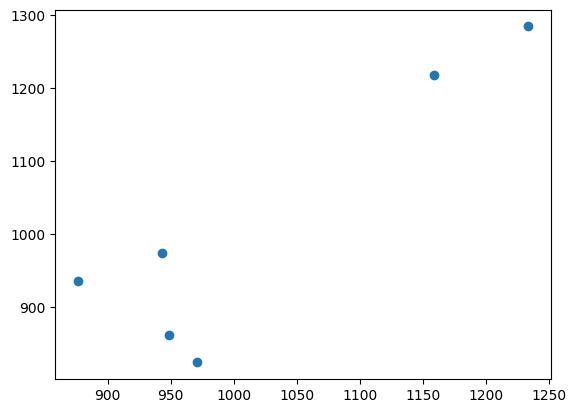

In [45]:
plt.scatter(y_test, y_pred)

In [46]:
residuals = y_test - y_pred
residuals

16    146.845627
8     -59.478327
14    -30.605323
20    -60.242586
17     87.482890
6     -50.870722
Name: index_price, dtype: float64

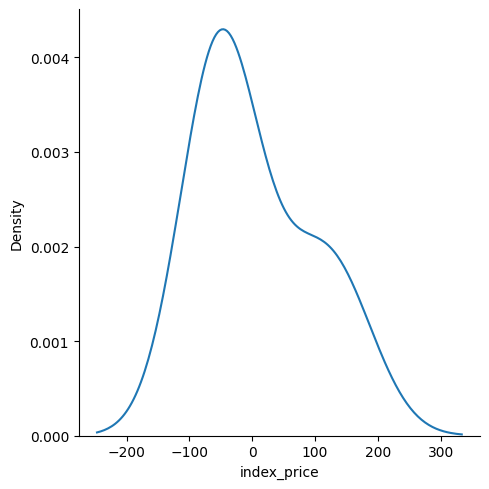

In [47]:
sns.displot(residuals, kind = 'kde')

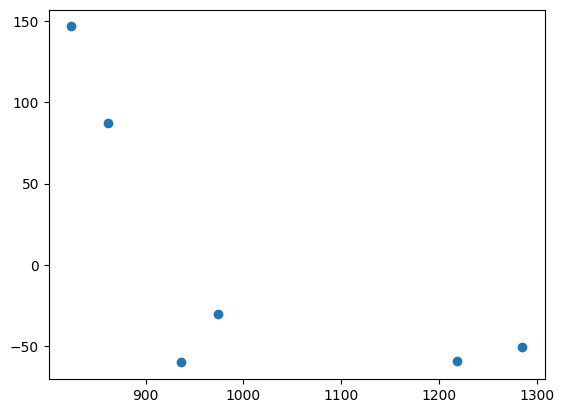

In [48]:
plt.scatter(y_pred, residuals)

In [49]:
# dataset is uniformly distributed and there are no patterns

OLS

In [51]:
import statsmodels.api as sm

In [52]:
models = sm.OLS(y_train, X_train).fit()

In [54]:
models.summary()

/opt/anaconda3/envs/ds_ml_llm_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.038
Model:                            OLS   Adj. R-squared (uncentered):             -0.083
Method:                 Least Squares   F-statistic:                             0.3122
Date:                Sat, 01 Mar 2025   Prob (F-statistic):                       0.736
Time:                        22:45:58   Log-Likelihood:                         -151.40
No. Observations:                  18   AIC:                                      306.8
Df Residuals:                      16   BIC:                                      308.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            91.8421    844.449      0.109      0.915   -1698.310    1881.994
x2          -125.9187    844.449     -0.149      0.883   -1916.071    1664.234
==============================================================================
Omnibus:                        2.233   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                1.413
Skew:                          -0.683   Prob(JB):                        0.493
Kurtosis:                       2.858   Cond. No.                         6.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
print(regression.coef_)

[  91.84207303 -125.91866035]
